In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('GameOfThrones.csv')
data

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


In [ ]:
del data['Type']
del data['book']

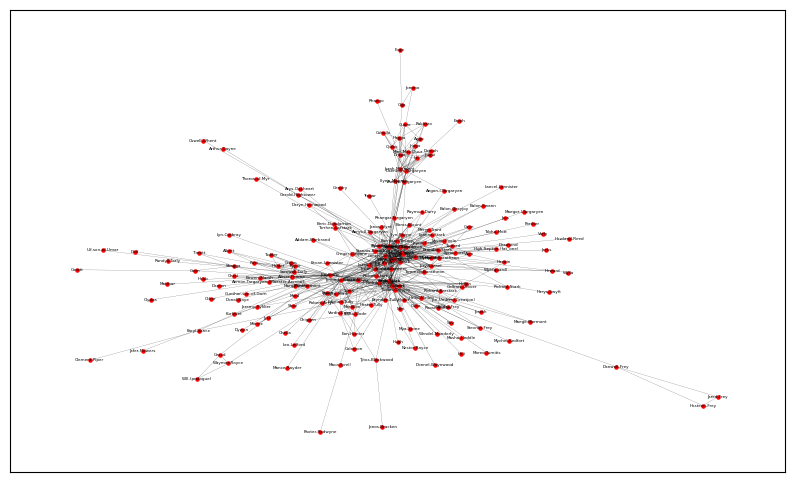

In [ ]:
# создание графа и заполнение его данными
Graf = nx.from_pandas_edgelist(data, 'Source', 'Target', ['weight'])

# формат размещения элементов графа для визуализации
pos = nx.spring_layout(Graf)
# pos = nx.circular_layout(Graf)

# выбираем что будет в качестве лейблов (веса)
labels = nx.get_edge_attributes(Graf,'weight')

# задаём размер полотна
plt.figure(figsize=(10,6))

# выводим граф на экран
nx.draw_networkx(Graf,
        pos,
        with_labels=True,
        node_color='red',
        node_size=5,       # размер метки узла
        width=0.1,         # толщина линии ребра
        font_size=3)       # размер шрифта лейблов

# добавляем отрисовку лейблов для рёбер
# nx.draw_networkx_edge_labels(Graf, pos)
plt.show()

Задание 1: проверить наличие компонент связности.

In [ ]:
comp_cv = nx.is_connected(Graf)
print('Наличие компонент связности:', comp_cv)

Наличие компонент связности: True


Задание 2: Проложить кратчайший маршрут (по расстоянию, drive) от дома до университета.

In [ ]:
%pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 2.7 MB/s eta 0:00:00


In [2]:
import osmnx as ox

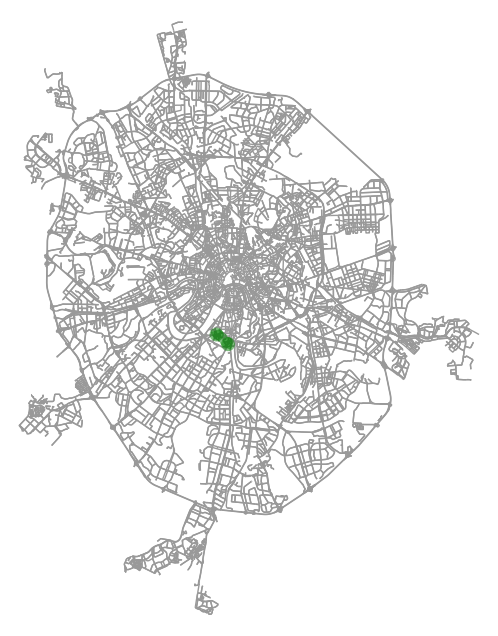

In [ ]:
G = ox.graph_from_place("Москва, Россия", network_type="drive")

# координаты дома и университета
my_address = (55.702186, 37.617977) # Малая Тульская улица, 55/1, Москва, Россия
university_address = (55.710702, 37.603747) # Орджоникидзе 3, Москва, Россия

# ближайшие узлы к заданным точкам
my_address = ox.nearest_nodes(G, my_address[1], my_address[0])
university_address = ox.nearest_nodes(G, university_address[1], university_address[0])

# кратчайший маршрут
route = ox.shortest_path(G,
                         my_address,
                         university_address,
                         weight="length")

fig, ax = ox.plot_graph_route(G,
                              route,             # маршрут
                              route_color="g",   # цвет линии маршрута
                              route_linewidth=4, # толщина линии маршрута
                              node_size=0,
                              bgcolor='#ffffff')

Задание 3: Проложить кратчайший маршрут (по времени, drive) от дома до университета

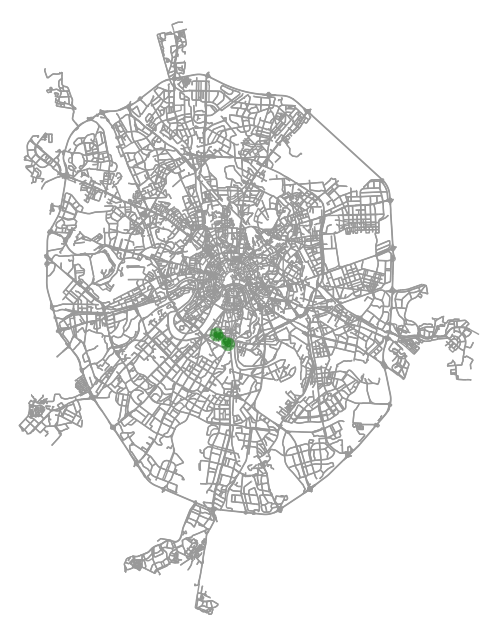

In [ ]:
for u, v, k, data in G.edges(data=True, keys=True):
    data["travel_time"] = data["length"] / 60.0  #  средняя скорость движения 60 км/ч

route = ox.shortest_path(G,
                         my_address,
                         university_address,
                         weight="travel_time")

fig, ax = ox.plot_graph_route(G,
                              route,
                              route_color="g",
                              route_linewidth=4,
                              node_size=0,
                              bgcolor='#ffffff')

Задание 4: Проложить кратчайший маршрут (по расстоянию, walk) от дома до университета

In [ ]:
G = ox.graph_from_place("Москва, Россия", network_type="walk")

# кратчайший маршрут
route = ox.shortest_path(G,
                         my_address,
                         university_address,
                         weight="length")

fig, ax = ox.plot_graph_route(G,
                              route,             # маршрут
                              route_color="g",   # цвет линии маршрута
                              route_linewidth=4, # толщина линии маршрута
                              node_size=0,
                              bgcolor='#ffffff')

# долго выполняется код, не поняла причину

Задание 5. Проложить кратчайший маршрут (по времени, walk) от дома до университета

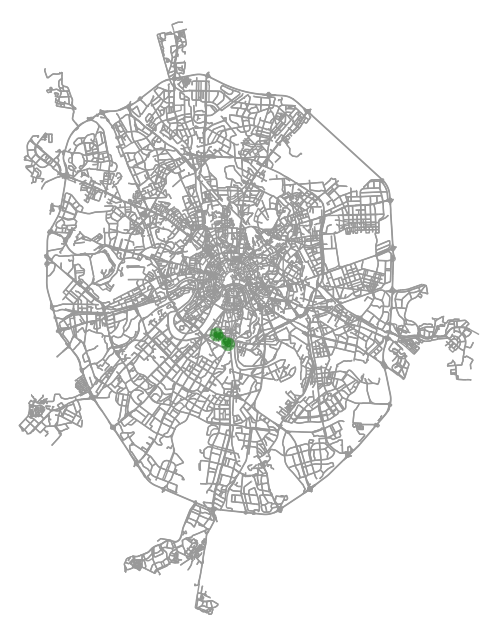

In [ ]:
for u, v, k, data in G.edges(data=True, keys=True):
    data["travel_time"] = data["length"] / 5.0  #  средняя скорость движения 80 км/ч

route = ox.shortest_path(G,
                         my_address,
                         university_address,
                         weight="travel_time")


fig, ax = ox.plot_graph_route(G,
                              route,
                              route_color="g",
                              route_linewidth=4,
                              node_size=0,
                              bgcolor='#ffffff')